In [1]:
import loaddata as ld
import pandas as pd
reload(ld)
metacritic_df,movies_df = ld.load_data()

metacritic_df['title_nopunc'] = metacritic_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.lower()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.lower()
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.strip()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.strip()


full_df = pd.merge(movies_df, metacritic_df, how='inner', on=['title_nopunc', 'year'], sort=True)
print len(full_df) 
print len(metacritic_df) 
print len(movies_df)

3242
4765
3728


In [17]:
full_df['user_score'].describe()

count     3242
unique      79
top        tbd
freq       135
Name: user_score, dtype: object

In [4]:
mylist =['Christopher Nolan', 'Quentin Tarantino', 'Martin Scorsese', 'Steven Spielberg', 'Woody Allen', 'Ridley Scott', 'Clint Eastwood', 'Steven Soderbergh', 'Tim Burton']

full_df.loc[~full_df.director_y.isin(mylist),'director_y'] = 'Other'

dummies = pd.get_dummies(full_df['director_y'])

new_df = pd.concat([full_df, dummies], axis=1)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 3241
Data columns (total 39 columns):
alt_title               3242 non-null object
director_x              1969 non-null object
domestic_gross          3200 non-null float64
mojo_slug               3242 non-null object
opening_per_theater     3138 non-null float64
opening_weekend_take    3138 non-null float64
production_budget       1454 non-null float64
release_date_limited    272 non-null object
release_date_wide       3239 non-null object
title_x                 3242 non-null object
widest_release          3163 non-null float64
worldwide_gross         2543 non-null float64
year                    3242 non-null float64
title_nopunc            3242 non-null object
complete                3242 non-null object
director_y              3242 non-null object
genre                   3242 non-null object
metacritic_page         3242 non-null object
metascore               3166 non-null float64
num_critic_reviews      3242 no

In [5]:
full_df_clean = new_df[new_df.user_score != 'tbd']
full_df_clean = full_df_clean.convert_objects(convert_numeric=True)
full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3241
Data columns (total 39 columns):
alt_title               3107 non-null object
director_x              1961 non-null object
domestic_gross          3078 non-null float64
mojo_slug               10 non-null float64
opening_per_theater     3023 non-null float64
opening_weekend_take    3023 non-null float64
production_budget       1452 non-null float64
release_date_limited    270 non-null object
release_date_wide       3104 non-null object
title_x                 9 non-null float64
widest_release          3043 non-null float64
worldwide_gross         2503 non-null float64
year                    3107 non-null float64
title_nopunc            10 non-null float64
complete                3107 non-null bool
director_y              3107 non-null object
genre                   3107 non-null object
metacritic_page         3107 non-null object
metascore               3065 non-null float64
num_critic_reviews      3107 non-null

c:\Users\HON643\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


1.15414848652
0.388951675437
0.344108620981


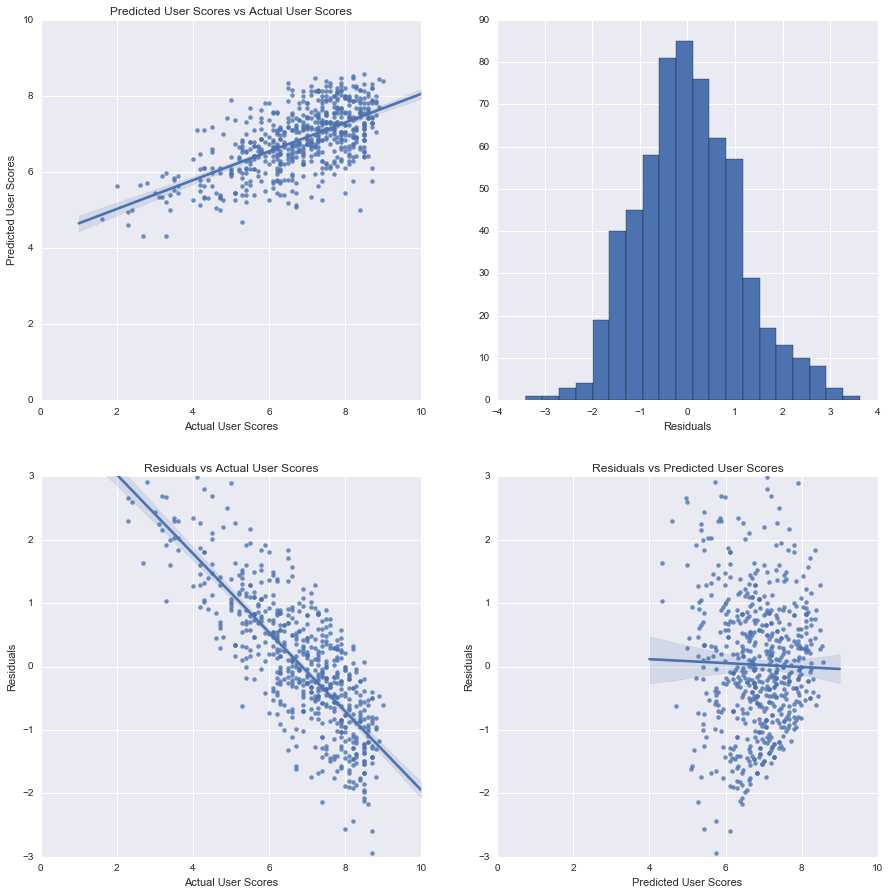

In [6]:
import numpy as np
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

# Remove Missings
full_df_nomiss = full_df_clean.dropna(subset=['user_score','metascore'])

inputs = full_df_nomiss[['metascore']]
response = full_df_nomiss['user_score']

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(inputs, response, test_size=0.2, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print mean_squared_error(y_pred, y_test)
print model.score(X_test, y_test)
print model.score(X_train, y_train)



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

resid = y_pred - y_test

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.regplot(x=y_test, y=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predicted User Scores vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Predicted User Scores")

ax2 = plt.subplot(222)
plt.hist(resid, bins=20)
plt.xlabel("Residuals")

ax3 = plt.subplot(223)
sns.regplot(x=y_test, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Residuals")

ax4 = plt.subplot(224)
sns.regplot(x=y_pred, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Predicted User Scores")
plt.xlabel("Predicted User Scores")
plt.ylabel("Residuals")

1.29280795054
0.375633225884
0.350272386101


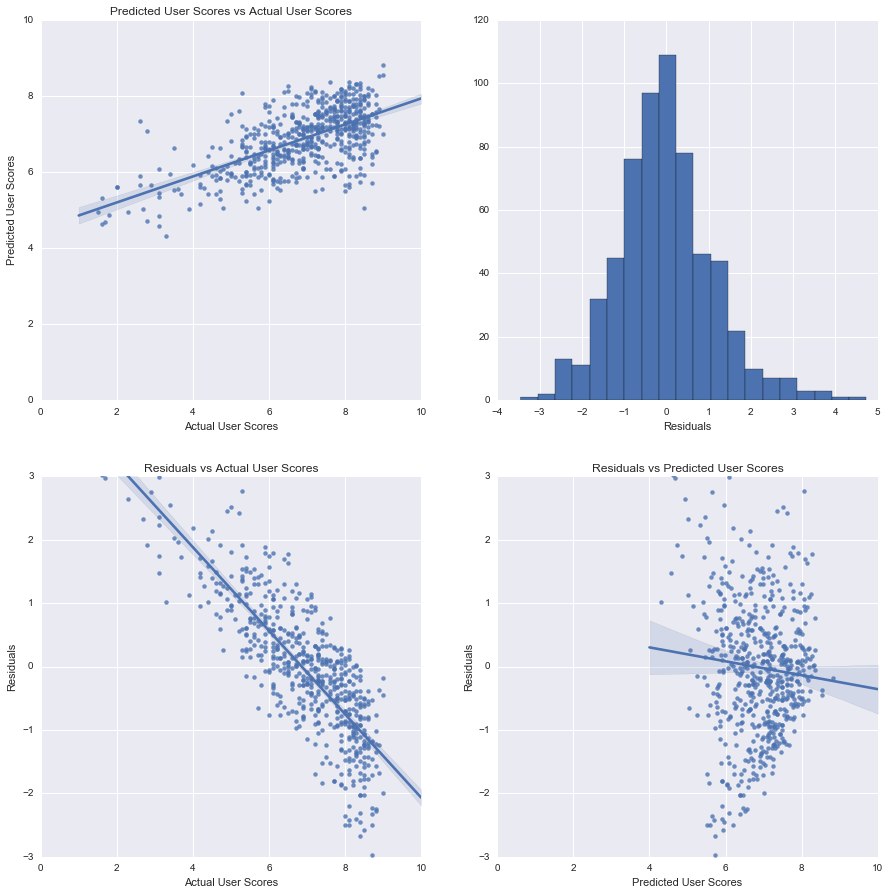

In [7]:
import numpy as np
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

# Remove Missings
full_df_nomiss = full_df_clean.dropna(subset=['user_score', 'domestic_gross','metascore'])

inputs = full_df_nomiss[['domestic_gross','metascore']]
response = full_df_nomiss['user_score']

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(inputs, response, test_size=0.2, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print mean_squared_error(y_pred, y_test)
print model.score(X_test, y_test)
print model.score(X_train, y_train)



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

resid = y_pred - y_test

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.regplot(x=y_test, y=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predicted User Scores vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Predicted User Scores")

ax2 = plt.subplot(222)
plt.hist(resid, bins=20)
plt.xlabel("Residuals")

ax3 = plt.subplot(223)
sns.regplot(x=y_test, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Residuals")

ax4 = plt.subplot(224)
sns.regplot(x=y_pred, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Predicted User Scores")
plt.xlabel("Predicted User Scores")
plt.ylabel("Residuals")

1.5060635412
0.157748281657
0.116936749554


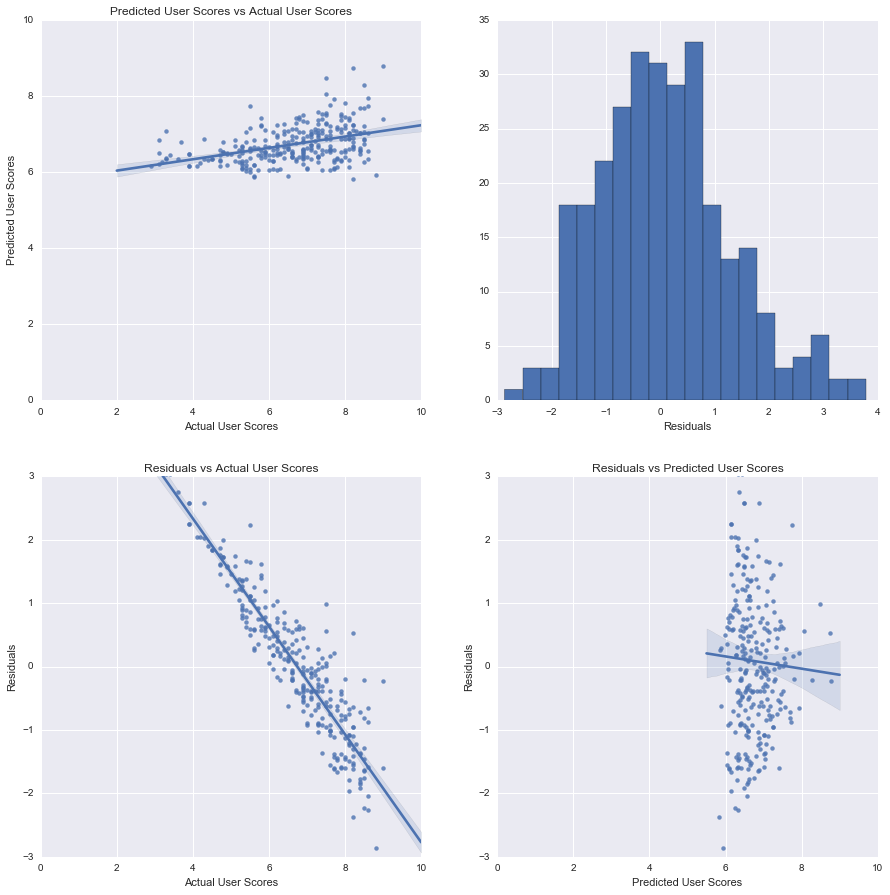

In [8]:
import numpy as np
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

# Remove Missings
full_df_nomiss = full_df_clean.dropna(subset=['production_budget','runtime_minutes','widest_release','Christopher Nolan', 'Clint Eastwood', 'Martin Scorsese', 'Other', 'Quentin Tarantino', 
                                              'Ridley Scott', 'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Woody Allen'])

inputs = full_df_nomiss[['production_budget','runtime_minutes','widest_release','Christopher Nolan', 'Clint Eastwood', 'Martin Scorsese', 'Other', 'Quentin Tarantino', 
                                              'Ridley Scott', 'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Woody Allen']]
response = full_df_nomiss['user_score']

# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(inputs, response, test_size=0.2, random_state=1)

# Fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print mean_squared_error(y_pred, y_test)
print model.score(X_test, y_test)
print model.score(X_train, y_train)



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

resid = y_pred - y_test

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.regplot(x=y_test, y=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Predicted User Scores vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Predicted User Scores")

ax2 = plt.subplot(222)
plt.hist(resid, bins=20)
plt.xlabel("Residuals")

ax3 = plt.subplot(223)
sns.regplot(x=y_test, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Actual User Scores")
plt.xlabel("Actual User Scores")
plt.ylabel("Residuals")

ax4 = plt.subplot(224)
sns.regplot(x=y_pred, y=resid)
plt.xlim(0, 10)
plt.ylim(-3, 3)
plt.title("Residuals vs Predicted User Scores")
plt.xlabel("Predicted User Scores")
plt.ylabel("Residuals")

In [11]:
! pip install plotly --upgrade
from plotly.offline import plot
from plotly.graph_objs import Scatter

Requirement already up-to-date: six in c:\users\hon643\appdata\local\continuum\anaconda3\lib\site-packages (from plotly)
  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\HON643\AppData\Local\pip\Cache\wheels\3b\3e\c2\3012de44c3d9e5a88ef0de13a682db45911e0842673403e002
Successfully built plotly
  Found existing installation: requests 2.9.1
    Uninstalling requests-2.9.1:
      Successfully uninstalled requests-2.9.1
  Found existing installation: pytz 2016.2
    Uninstalling pytz-2016.2:
      Successfully uninstalled pytz-2016.2


    DEPRECATION: Uninstalling a distutils installed project (requests) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (pytz) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

'file://c:\\Users\\HON643\\BDAProject1\\project_1\\temp-plot.html'

In [15]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])
from plotly.graph_objs import *
import numpy as np

iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

NameError: name 'iplot' is not defined

In [18]:
full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3241
Data columns (total 39 columns):
alt_title               3107 non-null object
director_x              1961 non-null object
domestic_gross          3078 non-null float64
mojo_slug               10 non-null float64
opening_per_theater     3023 non-null float64
opening_weekend_take    3023 non-null float64
production_budget       1452 non-null float64
release_date_limited    270 non-null object
release_date_wide       3104 non-null object
title_x                 9 non-null float64
widest_release          3043 non-null float64
worldwide_gross         2503 non-null float64
year                    3107 non-null float64
title_nopunc            10 non-null float64
complete                3107 non-null bool
director_y              3107 non-null object
genre                   3107 non-null object
metacritic_page         3107 non-null object
metascore               3065 non-null float64
num_critic_reviews      3107 non-null

In [26]:
x=full_df_clean['domestic_gross']
y=full_df_clean['user_score']

In [28]:
%matplotlib inline
import sys
sys.path.append('..')

from project_1.loaddata import get_boxofficemojo_movies
movie_list = get_boxofficemojo_movies()

Parsed 3728 movies from 3728 files


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
movies = pd.DataFrame(movie_list)
movies.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",3454.0,269784201.0,2008.0
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,2704.0,183611771.0,2000.0
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,2311.0,53478166.0,1999.0
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,63.0,203373.0,2012.0
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,2.0,NaN,2013.0


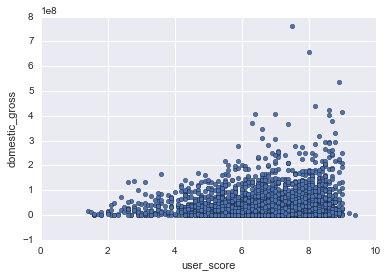

In [31]:
full_df_clean.plot(kind='scatter', x='user_score', y='domestic_gross')

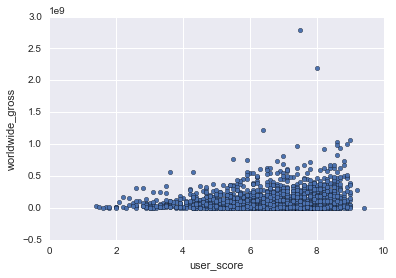

In [32]:
full_df_clean.plot(kind='scatter', x='user_score', y='worldwide_gross')

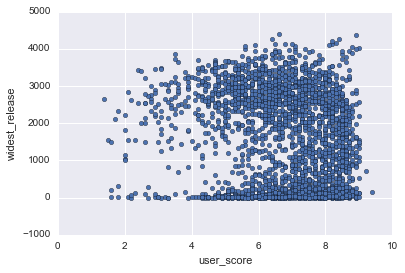

In [36]:
full_df_clean.plot(kind='scatter', x='user_score', y='widest_release')

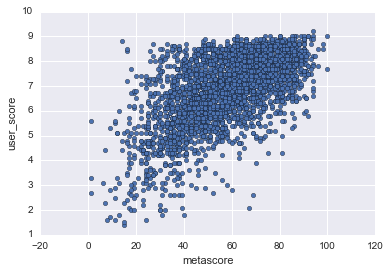

In [37]:
full_df_clean.plot(kind='scatter', x='metascore', y='user_score')

In [38]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print __version__ # requires version >= 1.9.0

1.9.10


In [39]:
from plotly.offline import plot
from plotly.graph_objs import Scatter

In [40]:
init_notebook_mode()

In [41]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [42]:
from plotly.graph_objs import *
import numpy as np

In [44]:
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

AttributeError: 'module' object has no attribute 'full_df_clean'

In [45]:
iplot({
    'data': [
        Scatter(x=full_df_clean['user_score],
                y=full_df_clean['domestic_gross],
                text=full_df_clean['text'],
                #marker=Marker(size=df[continent+'_marker.size'], sizemode='area', sizeref=131868,),
                mode='markers',
                #name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='User Score'), yaxis=YAxis(title='Domestic Gross', type='log'))
}, show_link=False)

SyntaxError: EOL while scanning string literal (<ipython-input-45-6c5207115ecc>, line 3)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([  18.,   34.,   52.,  113.,  216.,  404.,  604.,  718.,  749.,  199.]),
 array([ 1.4,  2.2,  3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4]),
 <a list of 10 Patch objects>)

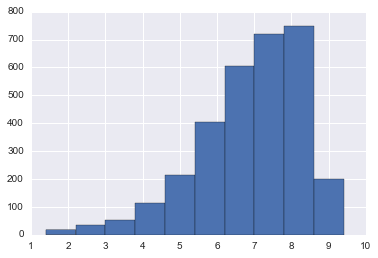

In [47]:
plt.hist(full_df_clean['user_score'])

<Container object of 3107 artists>

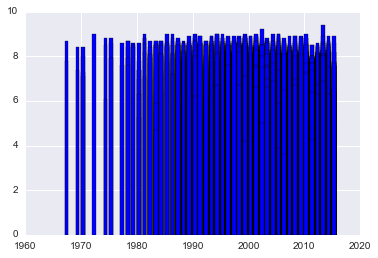

In [53]:
import matplotlib.pyplot as plt
X=full_df_clean['year']
Y=full_df_clean['user_score']

width = 1/1.5
plt.bar(X, Y, width, color="blue")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

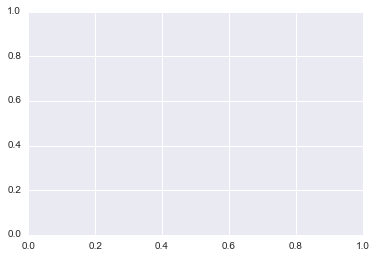

In [59]:
x=full_df_clean['user_score']
plt.hist(full_df_clean.groupby('year'))

In [60]:
import pandas as pd
user_score_df = pd.DataFrame(full_df_clean.groupby('year')['year'].count())
user_score_df['average_user_score'] = full_df_clean.groupby('year')['user_score'].mean()

In [76]:
user_score_df.columns= ['Movie_count','average_user_score']
user_score_df.reset_index()
user_score_df['num_user_ratings_total'] = full_df_clean.groupby('year')['num_user_ratings'].sum()

In [77]:
user_score_df1=user_score_df.reset_index()
user_score_df1

,year,Movie_count,average_user_score,num_user_ratings_total
0,1967.0,2,8.250000,117.0
1,1969.0,2,7.900000,92.0
2,1970.0,4,7.700000,105.0
3,1972.0,1,9.000000,1603.0
4,1974.0,3,7.800000,226.0
5,1975.0,3,8.433333,530.0
6,1977.0,2,8.100000,92.0
7,1978.0,5,8.260000,634.0
8,1979.0,3,8.500000,127.0
9,1980.0,7,7.114286,682.0


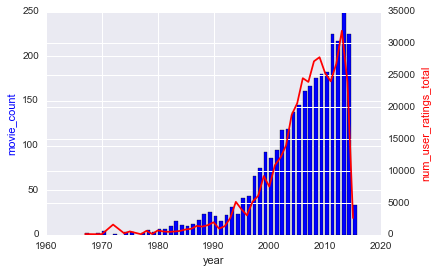

In [81]:
x=user_score_df1['year']
y=user_score_df1['Movie_count']
z=user_score_df1['num_user_ratings_total']
#plt.bar(x, y, width, color="blue")
#plt.plot(x, user_score_df1['num_user_ratings_total'],  color="red")


fig, ax1 = plt.subplots()
ax1.bar(x, y, width, color="blue")
ax1.set_xlabel('year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('movie_count', color='b')

    
ax2 = ax1.twinx()
ax2.plot(x, z, color='red')
ax2.set_ylabel('num_user_ratings_total', color='r')
plt.show()


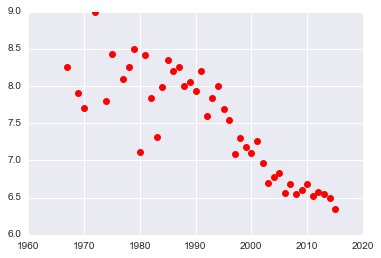

In [75]:
x=user_score_df1['year']
y=user_score_df1['average_user_score']
plt.plot(x, y, 'ro')